In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
Y_train.shape

(50000, 1)

In [83]:
Y_test.shape

(10000,)

In [7]:
Y_train[:8] #2D array

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7]], dtype=uint8)

In [8]:
#convert into 1D array 
Y_train = Y_train.reshape(-1,)
Y_train[:8]

array([6, 9, 9, 4, 1, 1, 2, 7], dtype=uint8)

In [85]:
Y_test = Y_test.reshape(-1,)
Y_test[:9]

array([3, 8, 8, 0, 6, 6, 1, 6, 3], dtype=uint8)

In [10]:
Classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
def plot_sample(X, Y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(Classes[Y[index]])
    
    

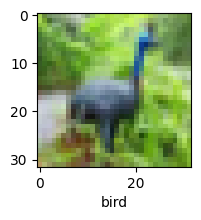

In [12]:
plot_sample(X_train, Y_train, 6)

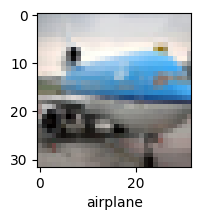

In [13]:
plot_sample(X_train, Y_train, 700)

In [14]:
#normalise data
X_train = X_train/255.0
X_test = X_test/255.0

In [56]:
from tensorflow.keras import models, layers

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [57]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [58]:
cnn.fit(X_train, Y_train, epochs = 30) 

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.3796 - loss: 1.7034
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5958 - loss: 1.1558
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6528 - loss: 1.0048
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6811 - loss: 0.9175
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7020 - loss: 0.8510
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7343 - loss: 0.7741
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7458 - loss: 0.7395
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7634 - loss: 0.6769
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7765 - loss: 0.6454
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7926 - loss: 0.6020
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8026 - loss: 0.5693
Epoch 12/20
1563/15

In [59]:
cnn.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6965 - loss: 1.1857


[1.1929107904434204, 0.6899999976158142]

In [60]:
Y_pred = cnn.predict(X_test)
Y_pred[:9]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[8.70988332e-03, 7.31616092e-05, 4.24781429e-05, 9.15599704e-01,
        3.13323853e-03, 6.18350245e-02, 8.24021583e-04, 2.17963257e-04,
        9.35886055e-03, 2.05630698e-04],
       [4.18808162e-02, 8.85073841e-01, 3.24967386e-10, 1.04178055e-11,
        1.33641523e-15, 1.74858146e-15, 9.50783730e-19, 2.92847547e-14,
        7.30424896e-02, 2.90858384e-06],
       [4.39340502e-01, 1.35496795e-01, 2.57089734e-01, 2.65779346e-03,
        3.15895668e-05, 1.12635920e-04, 2.24224891e-06, 1.09749161e-01,
        4.58199121e-02, 9.69971716e-03],
       [8.72361422e-01, 4.60940297e-04, 2.23376876e-04, 8.27635813e-05,
        1.13971046e-05, 3.37944880e-06, 1.19277210e-08, 5.14607279e-07,
        1.26855776e-01, 4.43349791e-07],
       [5.25053423e-09, 4.22170851e-05, 2.36997940e-02, 7.74491252e-03,
        8.21354389e-01, 1.38011583e-05, 1.47104010e-01, 2.24155494e-09,
        4.07827829e-05, 9.46603418e-09],
       [9.81179671e-09, 3.88708742e-07, 1.29437876e-05, 3.92429065e-03,
   

In [61]:
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:9]

[3, 1, 0, 0, 4, 6, 1, 3, 3]

In [62]:
Y_test[:9]

array([3, 8, 8, 0, 6, 6, 1, 6, 3], dtype=uint8)

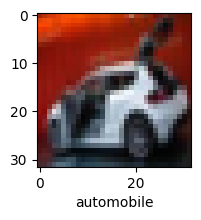

In [63]:
plot_sample(X_test, Y_test, 6)

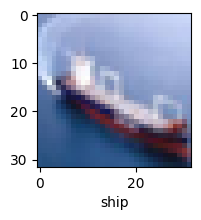

In [82]:
plot_sample(X_test, Y_test, 7088)

In [81]:
Classes[Y_classes[7088]]

'ship'